In [1]:
import Discriminator_SVM

model = Discriminator_SVM.build_discriminator()

In [5]:
# 獲取支持向量
support_vectors = model.support_vectors_
print("支持向量：", support_vectors)

# 獲取支持向量的索引
support_indices = model.support_
print("支持向量索引：", support_indices)
print("支持向量索引數量：", len(support_indices))


支持向量： [[4.7312e+04 3.0000e+00 5.1800e+02 ... 0.0000e+00 2.0000e+00 3.0000e+00]
 [4.7950e+04 4.0000e+00 4.9300e+02 ... 0.0000e+00 2.0000e+00 4.0000e+00]
 [3.8815e+04 3.0000e+00 5.5000e+02 ... 0.0000e+00 2.0000e+00 3.0000e+00]
 ...
 [1.4592e+04 3.0000e+00 7.7000e+01 ... 0.0000e+00 1.0000e+00 3.0000e+00]
 [4.6777e+04 5.0000e+00 8.7000e+01 ... 1.0000e+00 1.0000e+00 4.0000e+00]
 [2.3502e+04 3.0000e+00 7.7000e+01 ... 0.0000e+00 1.0000e+00 3.0000e+00]]
支持向量索引： [   63   105   191   214   371   418   559   599   698   705   748   755
   768   769   882   893   976   987   999  1046  1076  1082  1119  1136
  1157  1227  1291  1545  1629  1666  1667  1695  1741  1756  1759  1772
  1859  1875  1893  1929  1961  1988  2000  2012  2048  2062  2079  2085
  2097  2191  2314  2324  2468  2516  2746  2765  2780  2785  2793  2915
  3046  3074  3186  3192  3213  3216  3310  3317  3320  3393  3410  3413
  3452  3516  3523  3531  3532  3555  3571  3620  3725  3805  3864  3874
  3921  3984  3987  4038  4095 

In [6]:
w = model.coef_[0]  # 權重向量
b = model.intercept_[0]  # 偏置項
print("權重向量 w:", w)
print("偏置項 b:", b)

權重向量 w: [-2.36570003e-02 -6.21372154e+01 -2.73023750e+00  9.88284565e-01
  4.41225488e-02  0.00000000e+00  2.62783960e+00  1.11133996e+01
  2.18291540e+02 -7.58503029e+01]
偏置項 b: 689.6671908767074


In [7]:
import numpy as np
w_norm = np.linalg.norm(w)
margin = 2 / w_norm
print("邊界寬度:", margin)

邊界寬度: 0.008347522775774012


In [13]:

import numpy as np
import pandas as pd
features=[
        'flow duration', 'packet count', 'max pkt_length', 'min pkt_length',
           'max iat', 'min iat', 'fin count', 'syn count', 'psh count', 
           'ack count'
           ]
def load_data(dataset):
    df = pd.read_csv(dataset)
    df_selected = df[df['label'] == 1]
    df_selected = df_selected.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
    df_selected = df_selected.loc[(df_selected != 0).any(axis=1)]
    #df_selected = shuffle(df_selected)
    X_train = np.array(df_selected[features])
    return X_train
dataset = load_data("dataset_RNN_0120_slowloris.csv")
dataset

array([[ 1019,     4,   234, ...,     1,     2,     3],
       [31003,    10,   201, ...,     2,     6,     8],
       [    0,     2,   255, ...,     0,     2,     2],
       ...,
       [ 3374,     3,   576, ...,     0,     1,     3],
       [49416,    51,    54, ...,     0,     0,     0],
       [    0,     2,    88, ...,     0,     1,     2]], dtype=int64)

In [52]:
X_test = dataset[63:64]
X_test

array([[ 0,  2, 74, 74,  0,  0,  0,  2,  0,  2]], dtype=int64)

In [51]:
# 對某個數據點計算決策函數值  array([[  0,   2, 254,  66,   0,   0,   0,   0,   1,   2]], dtype=int64)
# X_test = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])  # 替換為你的測試數據
decision_values = model.decision_function(X_test)
print("決策函數值：", decision_values)
# 2->3, 254->256, 66->62, 1->0 2->3
X_test_modify = np.array([[0,   2, 254,  66,   0,   0,   0,   0,   1,   2]])  # 替換為你的測試數據
decision_values = model.decision_function(X_test_modify)
print("決策函數值：", decision_values)

# X_test = np.array([[0,0,86,64,0,0,10,11,0,12]])  # label 0
# decision_values = model.decision_function(X_test)
# print("決策函數值：", decision_values)    # 決策函數值： [-243.56086483]


決策函數值： [3.73015078]
決策函數值： [3.73015078]


In [75]:
# 對某個數據點計算決策函數值  array([[ 0,  2, 74, 74,  0,  0,  0,  2,  0,  2]], dtype=int64)
# X_test = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])  # 替換為你的測試數據
decision_values = model.decision_function(X_test)
print("決策函數值：", decision_values)
# 2->3, 254->256, 66->62, 1->0 2->3
X_test_modify = np.array([[0,  2, 71, 74,  0,  0,  0,  2,  0,  2]])  # 替換為你的測試數據
decision_values = model.decision_function(X_test_modify)
print("決策函數值：", decision_values)

決策函數值： [307.01443639]
決策函數值： [315.20514889]


X 形狀: (2, 10)
支持向量形狀: (778, 10)


NameError: name 'y' is not defined

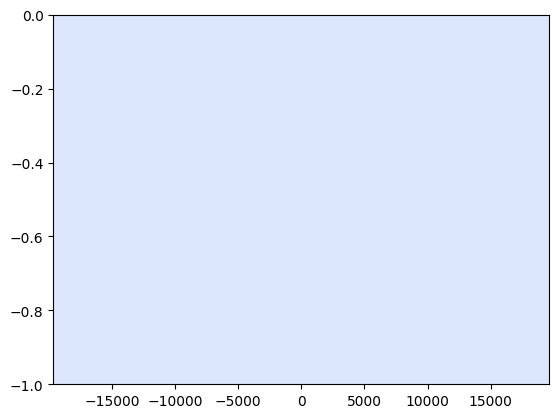

In [77]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X = X_train[0:2]
print("X 形狀:", X.shape)
print("支持向量形狀:", model.support_vectors_.shape)
# PCA 降維
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
support_vectors_2d = pca.transform(model.support_vectors_)

# 網格範圍與步長
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
step = 1.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

# 生成並預測網格點
grid_points_2d = np.c_[xx.ravel(), yy.ravel()]  # 形狀 (n_points, 2)
grid_points_10d = pca.inverse_transform(grid_points_2d)  # 映射回 10D
Z = model.predict(grid_points_10d)
Z = Z.reshape(xx.shape)

# 繪圖
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', cmap='coolwarm', alpha=0.6)
plt.scatter(support_vectors_2d[:, 0], support_vectors_2d[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary (Projected to 2D via PCA)')
plt.savefig("Decision_Boundary_Projected_to_2D.png")
plt.show()

In [33]:
print("Z 的唯一值:", np.unique(Z))

Z 的唯一值: [0 1]


In [ ]:
import itertools

for feat1, feat2 in itertools.combinations(range(X.shape[1]), 2):
    mean_values = np.mean(X_train, axis=0)
    x_min, x_max = X_train[:, feat1].min() - 1, X_train[:, feat1].max() + 1
    y_min, y_max = X_train[:, feat2].min() - 1, X_train[:, feat2].max() + 1
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    
    n_points = xx.ravel().shape[0]
    grid_points = np.zeros((n_points, X.shape[1]))
    grid_points[:, feat1] = xx.ravel()
    grid_points[:, feat2] = yy.ravel()
    for i in range(X.shape[1]):
        if i != feat1 and i != feat2:
            grid_points[:, i] = mean_values[i]
    
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, feat1], X[:, feat2], c=y, edgecolors='k', cmap='coolwarm', alpha=0.6)
    plt.scatter(model.support_vectors_[:, feat1], model.support_vectors_[:, feat2], 
                s=100, facecolors='none', edgecolors='k')
    plt.xlabel(f'Feature {feat1}')
    plt.ylabel(f'Feature {feat2}')
    plt.title(f'SVM Decision Boundary (Features {feat1} vs {feat2})')
    plt.show()

In [1]:
import pandas as pd
import numpy as np
# RNN
features=[
'fin count', 'syn count', 'psh count', 'ack count',
   'rst count', 'urg count', 'proto', 'packet count', 'pkt_length', 
   'min pkt_length', 'max pkt_length', 'flow duration', 'min iat',
   'max iat'
   ]
def find_min_max(dataset):
    df = pd.read_csv(dataset)
    df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
    df = df.loc[(df != 0).any(axis=1)]

    df_1 = df[df['label'] == 1]
    df_selected = df_1[features]
    
    max_values = df_selected.max()
    min_values = df_selected.min()
    
    print(f'df_label_1: {df_selected.shape[0]}')
    print(f'\nmax_values:\n {max_values}')
    print(max_values.tolist())
    print(f'\nmin_values:\n {min_values}')
    print(min_values.tolist())

    print("------------------------------")

    df_0 = df[df['label'] == 0]
    df_selected = df_0[features]
    
    max_values = df_selected.max()
    min_values = df_selected.min()
    
    print(f'df_label_0: {df_selected.shape[0]}')
    print(f'\nmax_values:\n {max_values}')
    print(max_values.tolist())
    print(f'\nmin_values:\n {min_values}')
    print(min_values.tolist())
    
# correalation

def cal_correlation(dataset):
    df = pd.read_csv(dataset)
    df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
    df = df.loc[(df != 0).any(axis=1)]
    correlation = df[features + ["label"]].corr()  # 直接計算相關矩陣
    print("correlation with label:")
    print(correlation["label"])

In [2]:
find_min_max("dataset_slowloris_normal_0225.csv")

df_label_1: 9513

max_values:
 fin count             2.0
syn count             4.0
psh count             8.0
ack count            12.0
rst count             8.0
urg count            12.0
proto                17.0
packet count         16.0
pkt_length         1843.0
min pkt_length      590.0
max pkt_length      640.0
flow duration     49962.0
min iat               0.0
max iat           49962.0
dtype: float64
[2.0, 4.0, 8.0, 12.0, 8.0, 12.0, 17.0, 16.0, 1843.0, 590.0, 640.0, 49962.0, 0.0, 49962.0]

min_values:
 fin count          0.0
syn count          0.0
psh count          0.0
ack count          0.0
rst count          0.0
urg count          0.0
proto              2.0
packet count       2.0
pkt_length         0.0
min pkt_length    54.0
max pkt_length    60.0
flow duration      0.0
min iat            0.0
max iat            0.0
dtype: float64
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 54.0, 60.0, 0.0, 0.0, 0.0]
------------------------------
df_label_0: 12549

max_values:
 fin count    

In [3]:
cal_correlation("dataset_slowloris_normal_0225.csv")

correlation with label:
fin count        -0.121640
syn count         0.386084
psh count         0.020186
ack count        -0.542685
rst count         0.120491
urg count        -0.538999
proto            -0.029206
packet count     -0.533808
pkt_length       -0.271016
min pkt_length    0.017484
max pkt_length   -0.631719
flow duration    -0.381588
min iat                NaN
max iat          -0.160687
label             1.000000
Name: label, dtype: float64
